In [19]:
import Kalman as klm
import pandas as pd
from matplotlib import pyplot as plt
import math

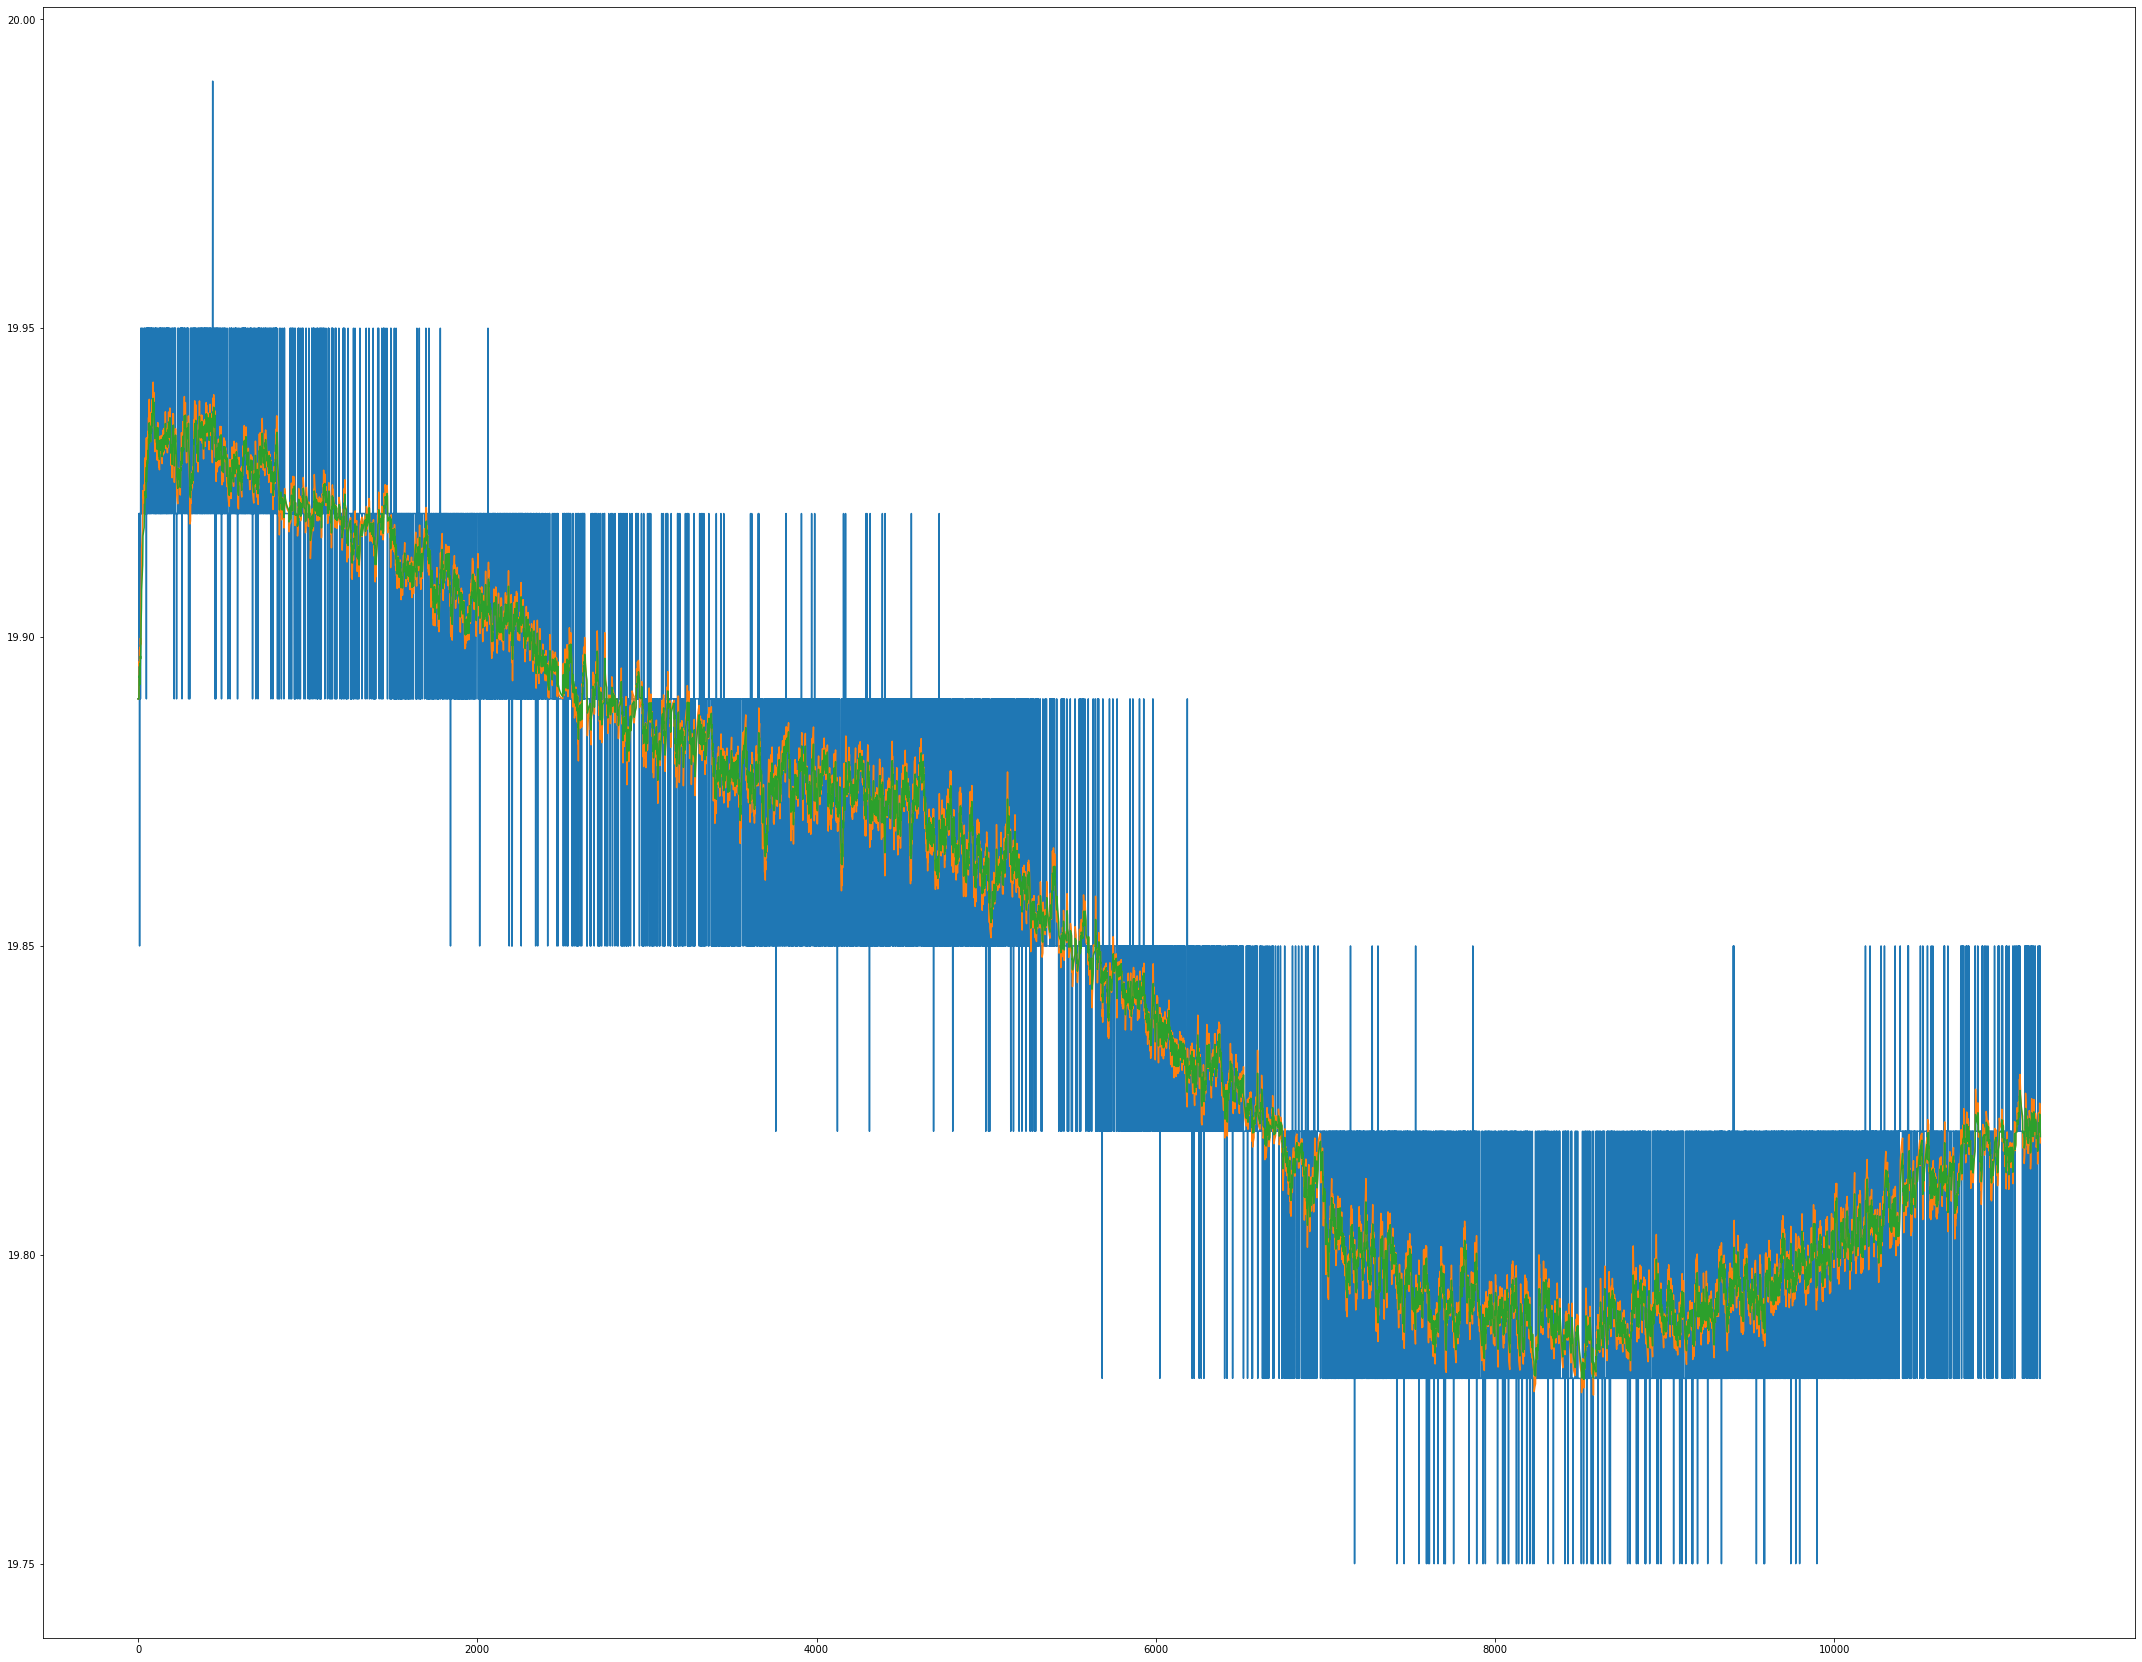

In [20]:

#WINDOW_SIZE = 500


if __name__ == "__main__":
    f = pd.read_csv("./noise0_1.csv")
    #print(f)
    # print(f['Temperature'])
    data = f['Temperature']
    x_0 = data[0]
    x = x_0
    #y = x_0
    P = math.sqrt(((2.05*2)**2)/12) # covariance of the error
    H = 1  # B
    R = 10 # covariance of the output
    # initial estimated covariance
    Q = R #!! In this case the state and the output are the same
    xs = [x_0]
    x_s2=[x_0]
    #ys = [x_0]
    for index, d in enumerate(data):
        #w = index-WINDOW_SIZE
        #for t in range(w if w >= 0 else 0, index):
        x = klm.kalman_filter(xs[-1], d, P, H, R, Q)
        xs.append(x)

        x = klm.kalman_filter(x_s2[-1], d, 2.05/3, H, R, Q)
        x_s2.append(x)
        
    plt.figure(figsize=(37.5, 30))
    plt.plot(data)
    plt.plot(range(len(xs)), xs, range(len(x_s2)),x_s2)

    with open("output.csv", 'w') as wf:
        wf.write("Smoothed Temperatures\n")
        for x in xs:
            wf.write(f"{x}\n")